## Decompose Time series into trend and seasonality

#### < Overview >

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

For more information, visit https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

#### < Time series components >

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

#### < Systematic components >

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

#### < Combining Time Series Components >

A series is thought to be an aggregate or combination of these four components.\
All series have a level and noise. The trend and seasonality components are optional.\
It is helpful to think of the components as combining either additively or multiplicatively.

- Additive Model

An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.\
A linear trend is a straight line.\
A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

- Multiplicative Model


A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level * Trend * Seasonality * Noise

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.\
A nonlinear trend is a curved line.\
A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

#### < Decomposition as a Tool >

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

#### < Statsmodels seasonal_decompose() > 

There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

#### < Additive Decomposition Example > 

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the period=1 argument). If a Pandas Series object is provided, this argument is not required.

In [1]:
# import library

from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

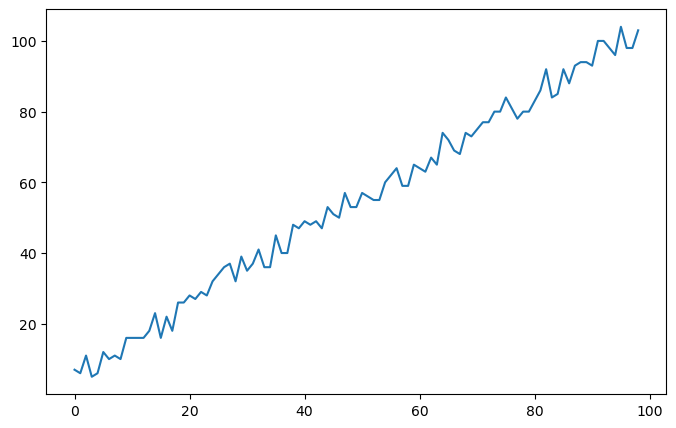

In [26]:
# plot random additive series 

plt.figure(figsize = (8,5))
series = [i + randrange(10) for i in range(1,100)]
plt.plot(series)

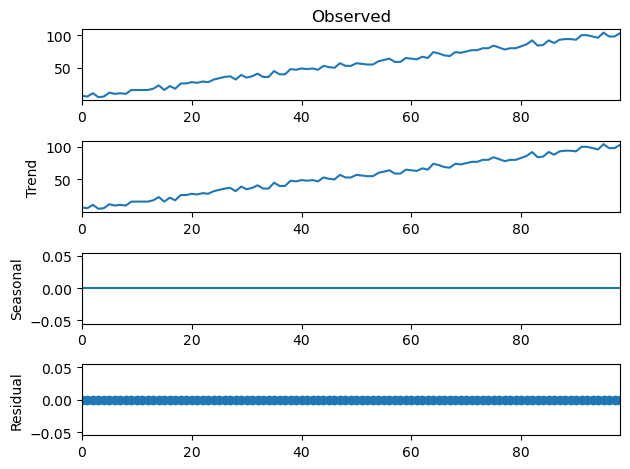

In [35]:
# plot the decomposition

result = seasonal_decompose(series, model = 'additve', period = 1)
result.plot()
plt.show()

#### Observations: 

- The entire series was taken as the trend component and that there was no seasonality.
- We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

Caution and healthy skepticism is needed when using automated decomposition methods.

#### < Multiplicative Decomposition Example > 

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

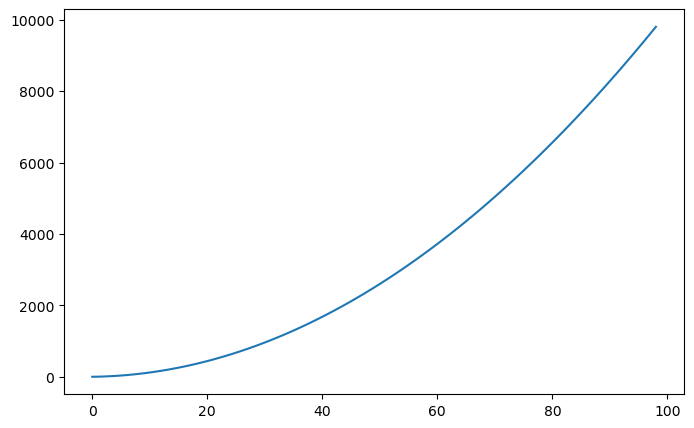

In [36]:
# plot random multiplicative series 

plt.figure(figsize = (8,5))
series = [i**2.0 for i in range(1,100)]
plt.plot(series)

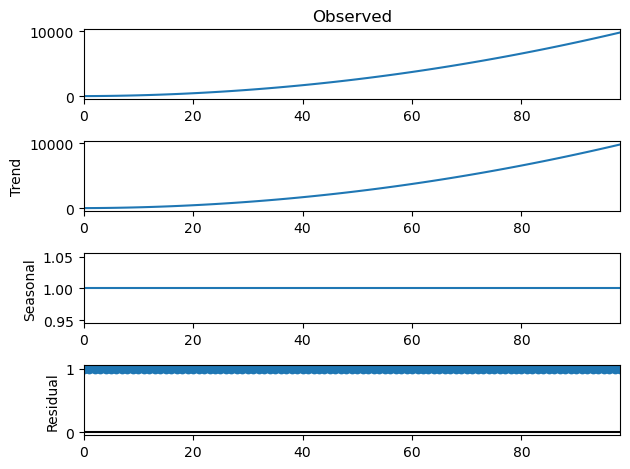

In [38]:
# plot the decomposition

result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
plt.show()

#### Observations: 

- Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

- Again, it is important to treat decomposition as a potentially useful analysis tool, but to consider exploring the many different ways it could be applied for your problem, such as on data after it has been transformed or on residual model errors.

#### Airline Passengers Dataset

Real-world example of decomposition of time-series analysis.

The Airline Passengers dataset describes the total number of airline passengers over a period of time.\
The units are a count of the number of airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.


In [55]:
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


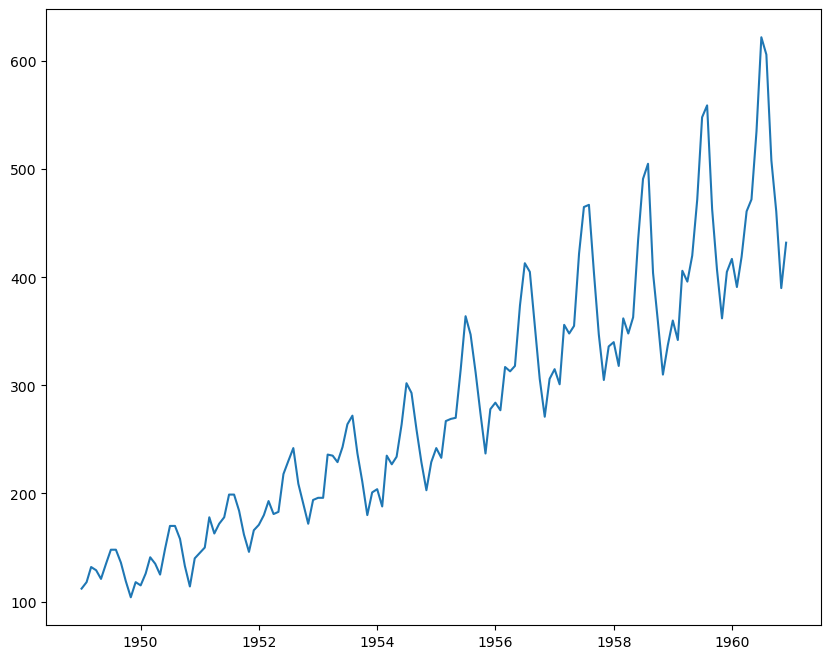

In [56]:
# import Airline datasets

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,index_col=0, header = 0, parse_dates=['Month'])

# plot the Airline dataset grapgh
plt.figure(figsize = (10,8))
plt.plot(df)

#### Observations: 

The above grapgh suggests that there may be a linear trend, but it is hard to be sure from eye-balling. There is also seasonality, but the amplitude (height) of the cycles appears to be increasing, suggesting that it is multiplicative.

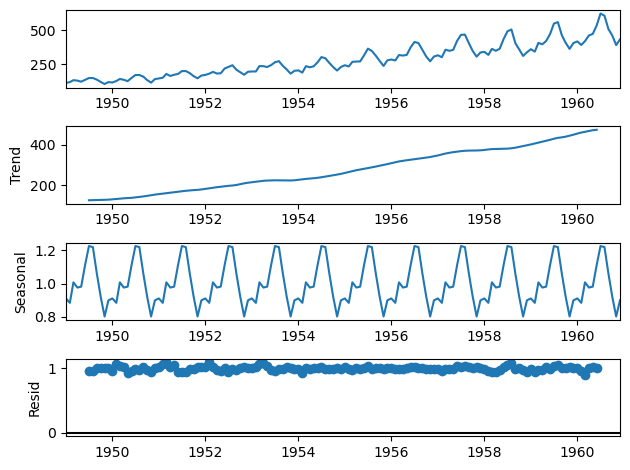

In [57]:
# plot the decomposition

result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

#### Observations: 

- We can see that the trend and seasonality information extracted from the series does seem reasonable. 
- The residuals are also interesting, showing periods of high variability in the early and later years of the series.